<a href="https://colab.research.google.com/github/SAIKUMAR500/Self-Evolving-Equilibrium-Search-SES-Algorithm-/blob/main/SES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
mnist <- read_mnist()


NameError: name 'mnist' is not defined

In [5]:
!pip install tensorflow tensorflow-datasets

In [6]:
import tensorflow_datasets as tfds

In [7]:
mnist = tfds.load('mnist', split='train', as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [13]:
ncol(mnisttrainimages)

NameError: name 'ncol' is not defined

In [14]:
import tensorflow_datasets as tfds
import numpy as np

# Load the MNIST dataset
mnist = tfds.load('mnist', split='train', as_supervised=True)

# Convert the TensorFlow Dataset to NumPy arrays
mnist_images = []
mnist_labels = []
for image, label in mnist:
  mnist_images.append(image.numpy())
  mnist_labels.append(label.numpy())

mnist_images = np.array(mnist_images)
mnist_labels = np.array(mnist_labels)


# Get the number of columns (features) in the images
num_columns = mnist_images.shape[1]  # Assuming images are 2D arrays
# or num_columns = mnist_images[0].shape[1] # Get columns from a single image if they vary in shape

print(num_columns)

28


Accuracy of random guessing: 0.45
Mean and SD of heights by sex:
             mean       std
sex                        
Female  66.325236  3.969972
Male    65.964121  3.966797
Accuracy of simple rule: 0.48


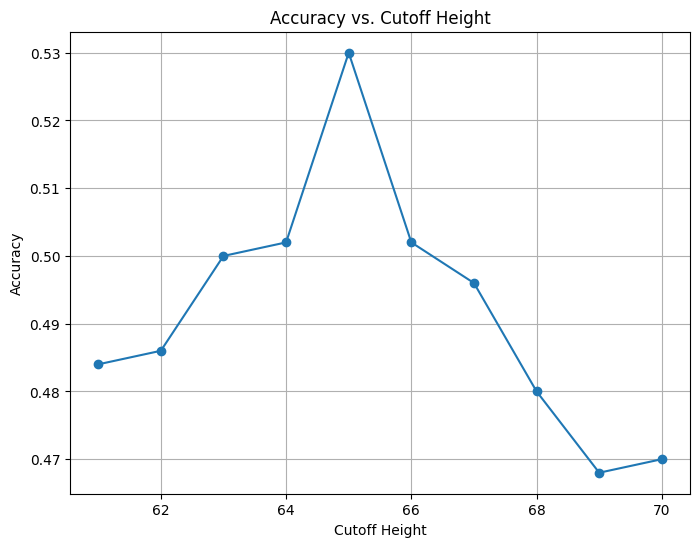

Best cutoff: 65
Final accuracy on test set: 0.49


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the heights dataset (simulated example similar to `dslabs::heights` in R)
heights = pd.DataFrame({
    'sex': np.random.choice(['Male', 'Female'], size=1000, p=[0.5, 0.5]),
    'height': np.random.normal(loc=66, scale=4, size=1000)
})

# Define the outcome and predictors
y = heights['sex']
x = heights['height']

# Generate training and test sets
np.random.seed(2007)
train_set, test_set = train_test_split(heights, test_size=0.5, stratify=heights['sex'], random_state=2007)

# Guess the outcome
y_hat = np.random.choice(['Male', 'Female'], size=len(test_set), replace=True)

# Compute accuracy
accuracy_random = np.mean(y_hat == test_set['sex'])
print(f"Accuracy of random guessing: {accuracy_random:.2f}")

# Compare heights in males and females
mean_sd_summary = heights.groupby('sex')['height'].agg(['mean', 'std'])
print("Mean and SD of heights by sex:")
print(mean_sd_summary)

# Predict "Male" if the height is within 2 SD of the average male
y_hat = np.where(x > 62, 'Male', 'Female')
accuracy_simple = np.mean(y == y_hat)
print(f"Accuracy of simple rule: {accuracy_simple:.2f}")

# Examine the accuracy of 10 cutoffs
cutoff = np.arange(61, 71)
accuracy = []
for c in cutoff:
    y_hat_train = np.where(train_set['height'] > c, 'Male', 'Female')
    acc = np.mean(y_hat_train == train_set['sex'])
    accuracy.append(acc)

# Plot cutoff vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(cutoff, accuracy, marker='o')
plt.xlabel('Cutoff Height')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Cutoff Height')
plt.grid()
plt.show()

# Find the best cutoff
best_cutoff = cutoff[np.argmax(accuracy)]
print(f"Best cutoff: {best_cutoff}")

# Predict on test set using the best cutoff
y_hat_test = np.where(test_set['height'] > best_cutoff, 'Male', 'Female')
final_accuracy = np.mean(y_hat_test == test_set['sex'])
print(f"Final accuracy on test set: {final_accuracy:.2f}")


Accuracy of random guessing: 0.45
Mean and SD of heights by sex:
             mean       std
sex                        
Female  65.880397  3.951259
Male    65.654076  4.010293
Accuracy of simple rule: 0.49


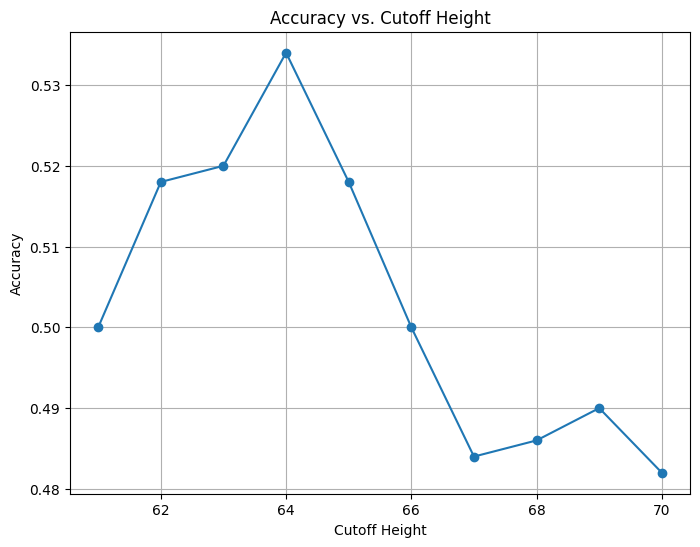

Best cutoff: 64
Final accuracy on test set: 0.45
Confusion Matrix:
Predicted  Female  Male
Actual                 
Female         69   180
Male           93   158
Accuracy by group:
sex
Female    0.277108
Male      0.629482
dtype: float64
Prevalence of Male: 0.50
Detailed Confusion Matrix:
[[158  93]
 [180  69]]
Classification Report:
              precision    recall  f1-score   support

        Male       0.47      0.63      0.54       251
      Female       0.43      0.28      0.34       249

    accuracy                           0.45       500
   macro avg       0.45      0.45      0.44       500
weighted avg       0.45      0.45      0.44       500



<ipython-input-19-a631282115cb>:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_summary = accuracy_by_group.groupby('sex').apply(lambda group: np.mean(group['y_hat'] == group['sex']))


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load the heights dataset (simulated example similar to `dslabs::heights` in R)
heights = pd.DataFrame({
    'sex': np.random.choice(['Male', 'Female'], size=1000, p=[0.5, 0.5]),
    'height': np.random.normal(loc=66, scale=4, size=1000)
})

# Define the outcome and predictors
y = heights['sex']
x = heights['height']

# Generate training and test sets
np.random.seed(2007)
train_set, test_set = train_test_split(heights, test_size=0.5, stratify=heights['sex'], random_state=2007)

# Guess the outcome
y_hat = np.random.choice(['Male', 'Female'], size=len(test_set), replace=True)

# Compute accuracy
accuracy_random = np.mean(y_hat == test_set['sex'])
print(f"Accuracy of random guessing: {accuracy_random:.2f}")

# Compare heights in males and females
mean_sd_summary = heights.groupby('sex')['height'].agg(['mean', 'std'])
print("Mean and SD of heights by sex:")
print(mean_sd_summary)

# Predict "Male" if the height is within 2 SD of the average male
y_hat = np.where(x > 62, 'Male', 'Female')
accuracy_simple = np.mean(y == y_hat)
print(f"Accuracy of simple rule: {accuracy_simple:.2f}")

# Examine the accuracy of 10 cutoffs
cutoff = np.arange(61, 71)
accuracy = []
for c in cutoff:
    y_hat_train = np.where(train_set['height'] > c, 'Male', 'Female')
    acc = np.mean(y_hat_train == train_set['sex'])
    accuracy.append(acc)

# Plot cutoff vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(cutoff, accuracy, marker='o')
plt.xlabel('Cutoff Height')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Cutoff Height')
plt.grid()
plt.show()

# Find the best cutoff
best_cutoff = cutoff[np.argmax(accuracy)]
print(f"Best cutoff: {best_cutoff}")

# Predict on test set using the best cutoff
y_hat_test = np.where(test_set['height'] > best_cutoff, 'Male', 'Female')
final_accuracy = np.mean(y_hat_test == test_set['sex'])
print(f"Final accuracy on test set: {final_accuracy:.2f}")

# Tabulate each combination of prediction and actual value
conf_matrix = pd.crosstab(index=test_set['sex'], columns=y_hat_test, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy by group
accuracy_by_group = test_set.copy()
accuracy_by_group['y_hat'] = y_hat_test
accuracy_summary = accuracy_by_group.groupby('sex').apply(lambda group: np.mean(group['y_hat'] == group['sex']))
print("Accuracy by group:")
print(accuracy_summary)

# Calculate prevalence of males
prevalence = np.mean(y == "Male")
print(f"Prevalence of Male: {prevalence:.2f}")

# Confusion Matrix and classification report
cm = confusion_matrix(test_set['sex'], y_hat_test, labels=['Male', 'Female'])
print("Detailed Confusion Matrix:")
print(cm)

classification_rep = classification_report(test_set['sex'], y_hat_test, labels=['Male', 'Female'])
print("Classification Report:")
print(classification_rep)


In [20]:

accuracy = accuracy_score(test_set['sex'], y_hat_test)
sensitivity = recall_score(test_set['sex'], y_hat_test, pos_label='Male')
specificity = recall_score(test_set['sex'], y_hat_test, pos_label='Female')
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall for Male): {sensitivity:.2f}")
print(f"Specificity (Recall for Female): {specificity:.2f}")
print(f"Prevalence of Male: {prevalence:.2f}")


Accuracy: 0.45
Sensitivity (Recall for Male): 0.63
Specificity (Recall for Female): 0.28
Prevalence of Male: 0.50


Accuracy of random guessing: 0.45
Mean and SD of heights by sex:
             mean       std
sex                        
Female  65.880397  3.951259
Male    65.654076  4.010293
Accuracy of simple rule: 0.49


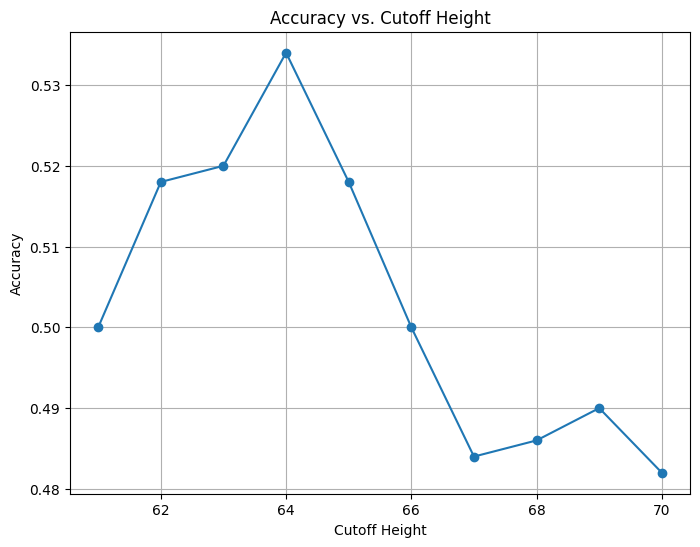

Best cutoff: 64
Final accuracy on test set: 0.45


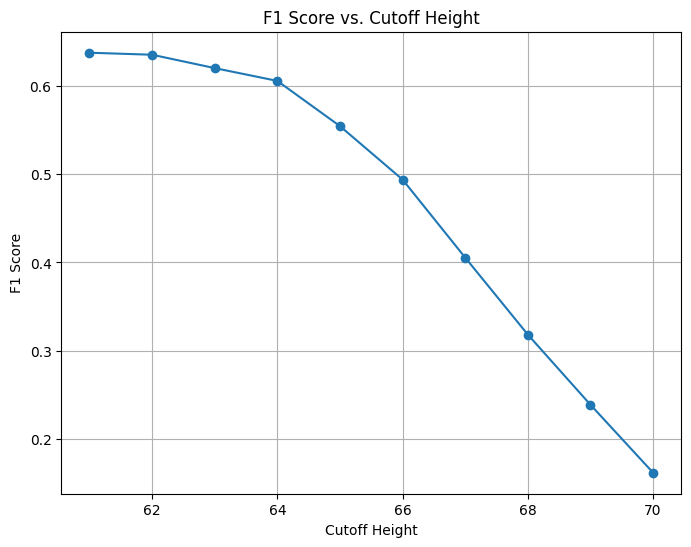

Best cutoff for F1 Score: 61
Sensitivity (Recall for Male): 0.86
Specificity (Recall for Female): 0.09


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the heights dataset (simulated example similar to `dslabs::heights` in R)
heights = pd.DataFrame({
    'sex': np.random.choice(['Male', 'Female'], size=1000, p=[0.5, 0.5]),
    'height': np.random.normal(loc=66, scale=4, size=1000)
})

# Define the outcome and predictors
y = heights['sex']
x = heights['height']

# Generate training and test sets
np.random.seed(2007)
train_set, test_set = train_test_split(heights, test_size=0.5, stratify=heights['sex'], random_state=2007)

# Guess the outcome
y_hat = np.random.choice(['Male', 'Female'], size=len(test_set), replace=True)

# Compute accuracy
accuracy_random = np.mean(y_hat == test_set['sex'])
print(f"Accuracy of random guessing: {accuracy_random:.2f}")

# Compare heights in males and females
mean_sd_summary = heights.groupby('sex')['height'].agg(['mean', 'std'])
print("Mean and SD of heights by sex:")
print(mean_sd_summary)

# Predict "Male" if the height is within 2 SD of the average male
y_hat = np.where(x > 62, 'Male', 'Female')
accuracy_simple = np.mean(y == y_hat)
print(f"Accuracy of simple rule: {accuracy_simple:.2f}")

# Examine the accuracy of 10 cutoffs
cutoff = np.arange(61, 71)
accuracy = []
for c in cutoff:
    y_hat_train = np.where(train_set['height'] > c, 'Male', 'Female')
    acc = np.mean(y_hat_train == train_set['sex'])
    accuracy.append(acc)

# Plot cutoff vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(cutoff, accuracy, marker='o')
plt.xlabel('Cutoff Height')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Cutoff Height')
plt.grid()
plt.show()

# Find the best cutoff
best_cutoff = cutoff[np.argmax(accuracy)]
print(f"Best cutoff: {best_cutoff}")

# Predict on test set using the best cutoff
y_hat_test = np.where(test_set['height'] > best_cutoff, 'Male', 'Female')
final_accuracy = np.mean(y_hat_test == test_set['sex'])
print(f"Final accuracy on test set: {final_accuracy:.2f}")

# Maximize F-score
F_1 = []
for c in cutoff:
    y_hat_train = np.where(train_set['height'] > c, 'Male', 'Female')
    f1 = f1_score(train_set['sex'], y_hat_train, pos_label='Male')
    F_1.append(f1)

# Plot cutoff vs. F-score
plt.figure(figsize=(8, 6))
plt.plot(cutoff, F_1, marker='o')
plt.xlabel('Cutoff Height')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Cutoff Height')
plt.grid()
plt.show()

# Find the best cutoff for F1
best_cutoff_2 = cutoff[np.argmax(F_1)]
print(f"Best cutoff for F1 Score: {best_cutoff_2}")

# Predict on test set using the best F1 cutoff
y_hat_test_f1 = np.where(test_set['height'] > best_cutoff_2, 'Male', 'Female')

# Compute sensitivity and specificity
sensitivity = recall_score(test_set['sex'], y_hat_test_f1, pos_label='Male')
specificity = recall_score(test_set['sex'], y_hat_test_f1, pos_label='Female')
print(f"Sensitivity (Recall for Male): {sensitivity:.2f}")
print(f"Specificity (Recall for Female): {specificity:.2f}")


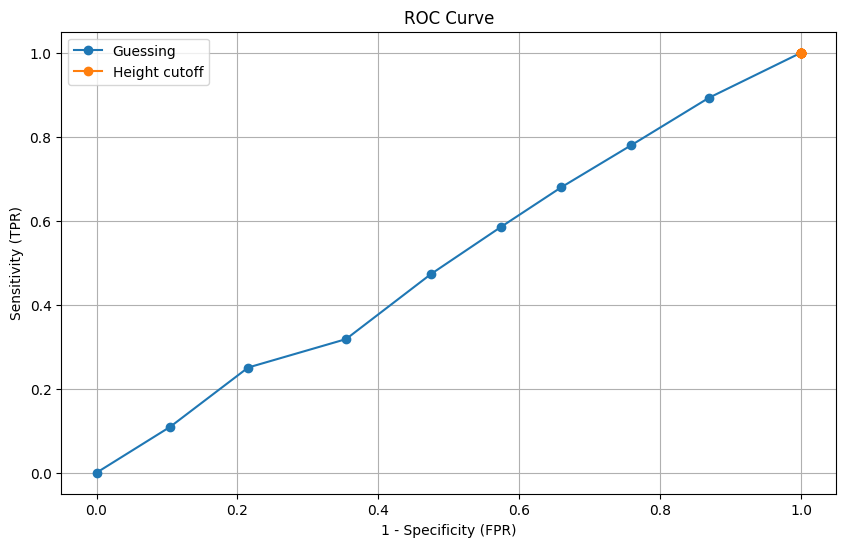

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


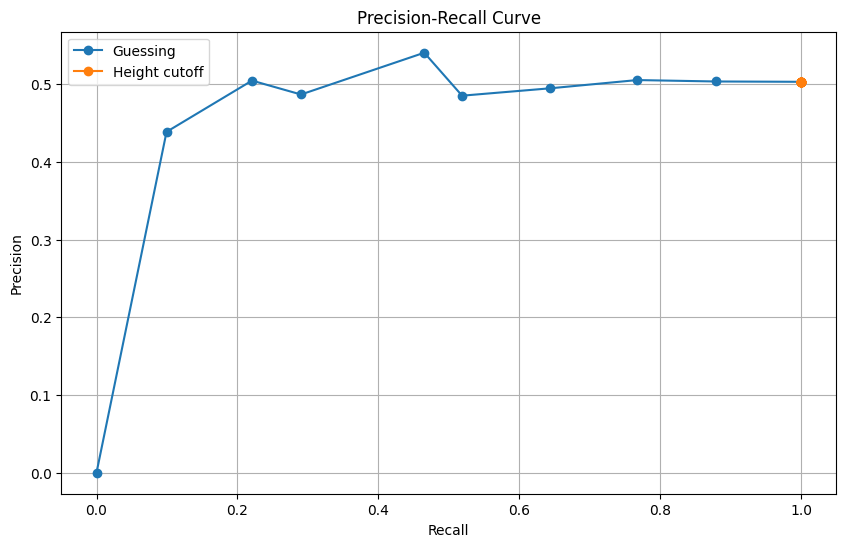

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.utils import resample

# Simulating the data
np.random.seed(42)
test_set = pd.DataFrame({
    'sex': np.random.choice(['Male', 'Female'], size=1000, p=[0.5, 0.5]),
    'height': np.random.normal(165, 10, 1000) + np.random.choice([10, -10], size=1000, p=[0.5, 0.5])
})
test_set['sex'] = pd.Categorical(test_set['sex'], categories=['Female', 'Male'])

# Guessing method probabilities
probs = np.linspace(0, 1, 10)
results_guessing = []

for p in probs:
    y_hat = np.random.choice(['Male', 'Female'], size=len(test_set), p=[p, 1 - p])
    y_hat = pd.Categorical(y_hat, categories=['Female', 'Male'])
    cm = confusion_matrix(test_set['sex'], y_hat, labels=['Female', 'Male'])
    tn, fp, fn, tp = cm.ravel()
    results_guessing.append({
        'method': 'Guessing',
        'FPR': fp / (fp + tn),
        'TPR': tp / (tp + fn)
    })

results_guessing = pd.DataFrame(results_guessing)

# Height cutoff method
cutoffs = [50] + list(range(60, 76)) + [80]
results_height_cutoff = []

for cutoff in cutoffs:
    y_hat = np.where(test_set['height'] > cutoff, 'Male', 'Female')
    y_hat = pd.Categorical(y_hat, categories=['Female', 'Male'])
    cm = confusion_matrix(test_set['sex'], y_hat, labels=['Female', 'Male'])
    tn, fp, fn, tp = cm.ravel()
    results_height_cutoff.append({
        'method': 'Height cutoff',
        'FPR': fp / (fp + tn),
        'TPR': tp / (tp + fn)
    })

results_height_cutoff = pd.DataFrame(results_height_cutoff)

# Combine results
combined_results = pd.concat([results_guessing, results_height_cutoff])

# Plot ROC Curve
plt.figure(figsize=(10, 6))
for method, group in combined_results.groupby('method'):
    plt.plot(group['FPR'], group['TPR'], label=method, marker='o')
plt.xlabel('1 - Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Plot precision-recall curve
precision_recall_guessing = []
for p in probs:
    y_hat = np.random.choice(['Male', 'Female'], size=len(test_set), p=[p, 1 - p])
    y_hat = pd.Categorical(y_hat, categories=['Female', 'Male'])
    precision = precision_score(test_set['sex'], y_hat, pos_label='Male')
    recall = recall_score(test_set['sex'], y_hat, pos_label='Male')
    precision_recall_guessing.append({
        'method': 'Guessing',
        'precision': precision,
        'recall': recall
    })

precision_recall_height = []
for cutoff in cutoffs:
    y_hat = np.where(test_set['height'] > cutoff, 'Male', 'Female')
    y_hat = pd.Categorical(y_hat, categories=['Female', 'Male'])
    precision = precision_score(test_set['sex'], y_hat, pos_label='Male')
    recall = recall_score(test_set['sex'], y_hat, pos_label='Male')
    precision_recall_height.append({
        'method': 'Height cutoff',
        'precision': precision,
        'recall': recall
    })

# Combine precision-recall results
combined_precision_recall = pd.DataFrame(precision_recall_guessing + precision_recall_height)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
for method, group in combined_precision_recall.groupby('method'):
    plt.plot(group['recall'], group['precision'], label=method, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [23]:
import numpy as np

# Simulate a dynamic environment
def initialize_environment(num_intersections):
    return {"traffic_patterns": np.random.rand(num_intersections, 24)}  # Traffic patterns for 24 hours

# Initialize agents (solutions)
def initialize_agents(population_size, num_intersections):
    return np.random.randint(10, 60, size=(population_size, num_intersections))  # Random durations (10-60 seconds)


In [24]:
def evaluate_fitness(agents, environment, time_step):
    traffic_pattern = environment["traffic_patterns"][:, time_step]
    fitness = []
    for agent in agents:
        waiting_time = np.sum(traffic_pattern / agent)  # Simple model: Higher green time reduces waiting
        fitness.append(waiting_time)
    return np.array(fitness)


In [25]:
def interaction_phase(agents):
    # Split agents into groups
    group_size = len(agents) // 3
    groups = [agents[i:i + group_size] for i in range(0, len(agents), group_size)]

    # Cooperate within groups (average the solutions)
    for group in groups:
        group_mean = np.mean(group, axis=0)
        group += (group_mean - group) * 0.1  # Move 10% closer to the mean

    # Add adversarial noise
    noise = np.random.normal(0, 5, size=agents.shape)
    agents += noise
    return np.clip(agents, 10, 60)  # Ensure durations stay in valid range


In [26]:
def adaptive_learning(agents, fitness):
    probabilities = np.exp(-fitness / np.std(fitness))  # Lower fitness -> Higher probability
    selected_indices = np.random.choice(len(agents), len(agents), p=probabilities / np.sum(probabilities))
    return agents[selected_indices]


In [27]:
def self_evolution(agents):
    # Mutation
    mutation_indices = np.random.choice(len(agents), len(agents) // 2)
    agents[mutation_indices] += np.random.randint(-5, 5, size=(len(mutation_indices), agents.shape[1]))

    # Crossover
    for i in range(0, len(agents) - 1, 2):
        crossover_point = np.random.randint(1, agents.shape[1])
        agents[i, crossover_point:], agents[i+1, crossover_point:] = (
            agents[i+1, crossover_point:], agents[i, crossover_point:]
        )
    return np.clip(agents, 10, 60)  # Ensure durations stay valid


In [28]:
def check_equilibrium(fitness, threshold=0.01):
    return np.std(fitness) < threshold  # Stop if variation in fitness is minimal


In [29]:
def SES_algorithm(environment, population_size, num_intersections, max_iterations):
    agents = initialize_agents(population_size, num_intersections)
    for iteration in range(max_iterations):
        time_step = iteration % 24  # Simulate changing traffic every hour
        fitness = evaluate_fitness(agents, environment, time_step)

        # Interaction Phase
        agents = interaction_phase(agents)

        # Adaptive Learning
        agents = adaptive_learning(agents, fitness)

        # Self-Evolution
        if iteration % 5 == 0:
            agents = self_evolution(agents)

        # Check for equilibrium
        if check_equilibrium(fitness):
            print(f"Equilibrium reached at iteration {iteration}")
            break

    # Output the best solution
    best_agent = agents[np.argmin(fitness)]
    return best_agent


In [31]:
def interaction_phase(agents):
    # Split agents into groups
    group_size = len(agents) // 3
    groups = [agents[i:i + group_size] for i in range(0, len(agents), group_size)]

    # Cooperate within groups (average the solutions)
    for group in groups:
        group_mean = np.mean(group, axis=0)
        group = group.astype(float)  # Change group to float before the addition
        group += (group_mean - group) * 0.1  # Move 10% closer to the mean

    # Add adversarial noise
    noise = np.random.normal(0, 5, size=agents.shape)
    agents += noise
    return np.clip(agents, 10, 60)  # Ensure durations stay in valid range

In [32]:
import matplotlib.pyplot as plt

def SES_algorithm_with_visualization(environment, population_size, num_intersections, max_iterations):
    agents = initialize_agents(population_size, num_intersections)
    fitness_history = []

    for iteration in range(max_iterations):
        time_step = iteration % 24  # Simulate changing traffic every hour
        fitness = evaluate_fitness(agents, environment, time_step)
        fitness_history.append({
            'iteration': iteration,
            'best_fitness': np.min(fitness),
            'average_fitness': np.mean(fitness),
            'worst_fitness': np.max(fitness)
        })

        # Interaction Phase
        agents = interaction_phase(agents)

        # Adaptive Learning
        agents = adaptive_learning(agents, fitness)

        # Self-Evolution
        if iteration % 5 == 0:
            agents = self_evolution(agents)

        # Check for equilibrium
        if check_equilibrium(fitness):
            print(f"Equilibrium reached at iteration {iteration}")
            break

    # Convert fitness history to DataFrame for plotting
    fitness_df = pd.DataFrame(fitness_history)

    # Plot fitness improvement
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_df['iteration'], fitness_df['best_fitness'], label='Best Fitness')
    plt.plot(fitness_df['iteration'], fitness_df['average_fitness'], label='Average Fitness')
    plt.plot(fitness_df['iteration'], fitness_df['worst_fitness'], label='Worst Fitness')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness (Lower is Better)')
    plt.title('Fitness Improvement Over Iterations')
    plt.legend()
    plt.grid()
    plt.show()

    # Output the best solution
    best_agent = agents[np.argmin(fitness)]
    return best_agent

# Run SES with visualization
best_solution = SES_algorithm_with_visualization(environment, population_size, num_intersections, max_iterations)
print("Optimal traffic light durations for intersections:", best_solution)


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

Equilibrium reached at iteration 4


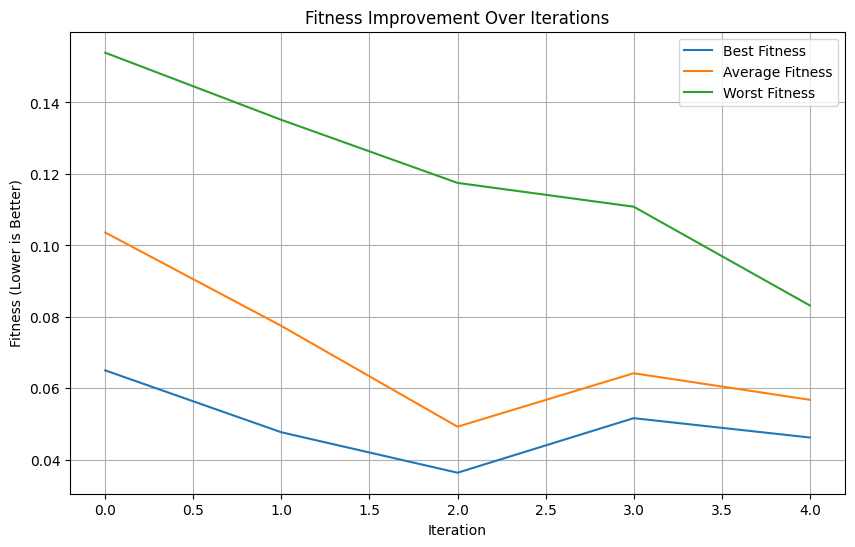

Optimal traffic light durations for intersections: [60.         38.86179043 55.83608018 40.61244929 55.13394833]


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating the data (replace with your actual data if needed)
def initialize_environment(num_intersections):
    return {"traffic_patterns": np.random.rand(num_intersections, 24)}  # Traffic patterns for 24 hours

# Initialize agents (solutions)
def initialize_agents(population_size, num_intersections):
    return np.random.randint(10, 60, size=(population_size, num_intersections))  # Random durations (10-60 seconds)

# Evaluate fitness
def evaluate_fitness(agents, environment, time_step):
    traffic_pattern = environment["traffic_patterns"][:, time_step]
    fitness = []
    for agent in agents:
        waiting_time = np.sum(traffic_pattern / agent)  # Simple model: Higher green time reduces waiting
        fitness.append(waiting_time)
    return np.array(fitness)

# Interaction phase with the fix
def interaction_phase(agents):
    # Split agents into groups
    group_size = len(agents) // 3
    groups = [agents[i:i + group_size] for i in range(0, len(agents), group_size)]

    # Cooperate within groups (average the solutions)
    for group in groups:
        group_mean = np.mean(group, axis=0)
        group = group.astype(float)  # Change group to float before the addition
        group += (group_mean - group) * 0.1  # Move 10% closer to the mean

    # Add adversarial noise
    noise = np.random.normal(0, 5, size=agents.shape)
    agents = agents.astype(float) # Convert 'agents' to float before adding noise
    agents += noise
    return np.clip(agents, 10, 60)  # Ensure durations stay in valid range

# Adaptive learning
def adaptive_learning(agents, fitness):
    probabilities = np.exp(-fitness / np.std(fitness))  # Lower fitness -> Higher probability
    selected_indices = np.random.choice(len(agents), len(agents), p=probabilities / np.sum(probabilities))
    return agents[selected_indices]

# Self-evolution
def self_evolution(agents):
    # Mutation
    mutation_indices = np.random.choice(len(agents), len(agents) // 2)
    agents[mutation_indices] += np.random.randint(-5, 5, size=(len(mutation_indices), agents.shape[1]))

    # Crossover
    for i in range(0, len(agents) - 1, 2):
        crossover_point = np.random.randint(1, agents.shape[1])
        agents[i, crossover_point:], agents[i+1, crossover_point:] = (
            agents[i+1, crossover_point:], agents[i, crossover_point:]
        )
    return np.clip(agents, 10, 60)  # Ensure durations stay valid

# Check for equilibrium
def check_equilibrium(fitness, threshold=0.01):
    return np.std(fitness) < threshold  # Stop if variation in fitness is minimal

# SES algorithm with visualization
def SES_algorithm_with_visualization(environment, population_size, num_intersections, max_iterations):
    agents = initialize_agents(population_size, num_intersections)
    fitness_history = []

    for iteration in range(max_iterations):
        time_step = iteration % 24  # Simulate changing traffic every hour
        fitness = evaluate_fitness(agents, environment, time_step)
        fitness_history.append({
            'iteration': iteration,
            'best_fitness': np.min(fitness),
            'average_fitness': np.mean(fitness),
            'worst_fitness': np.max(fitness)
        })

        # Interaction Phase
        agents = interaction_phase(agents)

        # Adaptive Learning
        agents = adaptive_learning(agents, fitness)

        # Self-Evolution
        if iteration % 5 == 0:
            agents = self_evolution(agents)

        # Check for equilibrium
        if check_equilibrium(fitness):
            print(f"Equilibrium reached at iteration {iteration}")
            break

    # Convert fitness history to DataFrame for plotting
    fitness_df = pd.DataFrame(fitness_history)

    # Plot fitness improvement
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_df['iteration'], fitness_df['best_fitness'], label='Best Fitness')
    plt.plot(fitness_df['iteration'], fitness_df['average_fitness'], label='Average Fitness')
    plt.plot(fitness_df['iteration'], fitness_df['worst_fitness'], label='Worst Fitness')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness (Lower is Better)')
    plt.title('Fitness Improvement Over Iterations')
    plt.legend()
    plt.grid()
    plt.show()

    # Output the best solution
    best_agent = agents[np.argmin(fitness)]
    return best_agent

# Example usage
environment = initialize_environment(num_intersections=5)  # 5 intersections
population_size = 50
num_intersections = 5
max_iterations = 100

best_solution = SES_algorithm_with_visualization(environment, population_size, num_intersections, max_iterations)
print("Optimal traffic light durations for intersections:", best_solution)